# <span style="color:RED"> THE SPARKS FOUNDATION</span> - Data Science and Business Analytics

## Task - 1 Prediction using Supervised ML
<ul>
<li>Predict the percentage of the student based on the number of study hours</li>
<li>To Predict the score if the student studies for 9.25 hours a day</li>
</ul>

> ## Name : <span style="background-color: #FFFF00">**LALITH ADITYA ADEPU**</span> 
> ### <span style="color:red"> Graduate Rotational Internship Program</span> JUNE 22

### Dataset : [Study hours and Scores](http://bit.ly/w-data)

### 1. Importing the necessary **libraries**
<ul>
    <li>PANDAS</li>
    <li>NUMPY</li>
    <li>MATPLOTLIB</li>
    <li>SEABORN and</li>
    <li>SCIKIT LEARN</li>
</ul>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as lr
from sklearn import metrics


### 2. Reading the data from the given Link

In [3]:
link = "http://bit.ly/w-data"
df = pd.read_csv(link)

In [4]:
print('The given Dataset: ')
df

The given Dataset: 


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
df.info() #Gives the information about the given dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.describe() # Gives the descriptive statistics about the data in the dataframe

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df.head() #Returns the first 5 rows of the given dataframe

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
df.tail() #Returns the last 5 rows of the given dataframe

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [9]:
df.isna().sum() #It is used to detect missing values

Hours     0
Scores    0
dtype: int64

In [10]:
df.dtypes #Returns the datatype of the data fields

Hours     float64
Scores      int64
dtype: object

### 3. Visualising the Dataset inorder to observe any correlation between the two variables

<Figure size 1080x720 with 0 Axes>

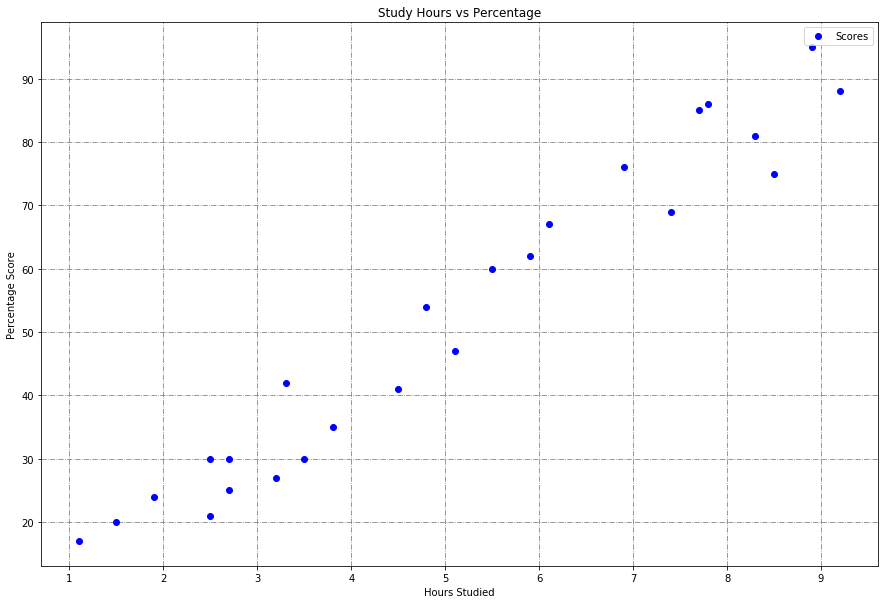

In [58]:
# Plotting the dataset
plt.figure(figsize=(15,10))
df.plot(x='Hours', y='Scores', style='o', markeredgecolor='blue', markerfacecolor='blue' )
plt.title('Study Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid(True, color='grey', linestyle= "-.")
plt.show()

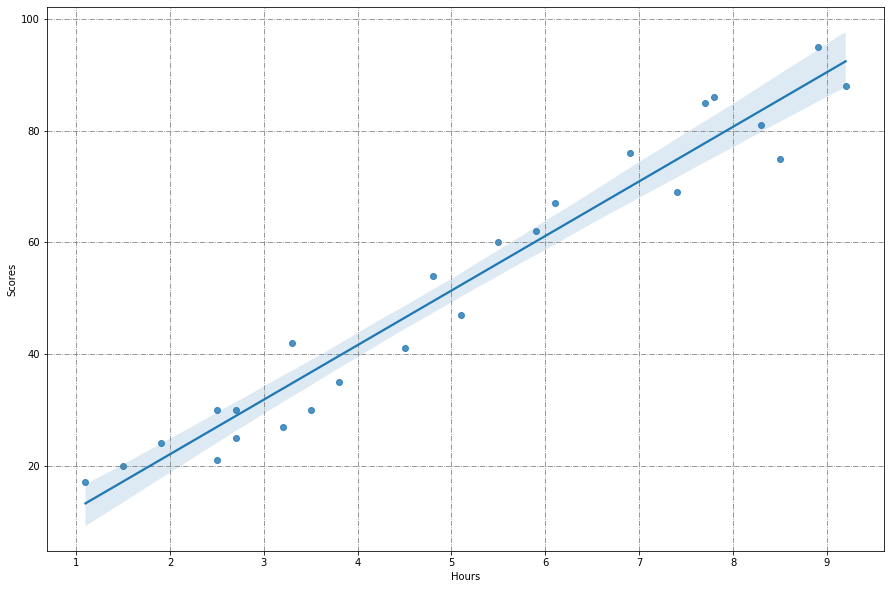

In [14]:
#Plotting the Regression Line or Best-Fit Line using seaborn
plt.figure(figsize=(15,10))
sns.regplot(x='Hours', y='Scores', data=df)
plt.grid(True, color='gray', linestyle='-.')

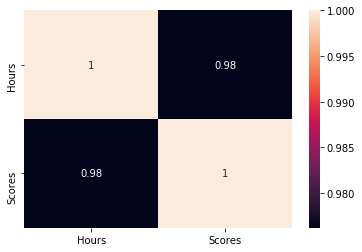

In [13]:
correlation = df.corr() #Determines the extent to which the variables are linearly related
sns.heatmap(correlation, annot=True) #heatmap showing the correlation

### From the above graph and the heatmap we can clearly observe a positive linear relation between the two variables 
<ol> <li>The number of hours studied and </li> <li>The Scores</li></ol>

> ### The Linear Regression model can therefore be used to predict the Scores/Percentages based on the Number of Study Hours
> #### <ul> <li><span style="color:red">Study Hours</span> is the **Independent Variable**</li> <li><span style="color:red">Scores</span> is the **Dependent Variable**</li></ul>

### 4. Data Preparation

In [15]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [16]:
# Dividing the data using the iloc function
h = df.iloc[:, :1].values  #stores the values no. of Study Hours
s = df.iloc[:, 1:].values  #stores the scores

In [17]:
h #Contains the values of column Hours

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [18]:
s #Contains the values of column Scores

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

 ##### Splitting the data into test and training sets 

In [19]:
h_train, h_test, s_train, s_test = train_test_split(h, s,test_size=0.3, random_state=0)

### 5. Supervised Learning i.e. Training the Data

In [20]:
regModel = lr()  
regModel.fit(h_train, s_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 6. Visualising the trained Model

In [21]:
x = regModel.coef_
x

array([[9.78856669]])

In [22]:
c = regModel.intercept_
c

array([2.37081538])

##### Plotting for the training data

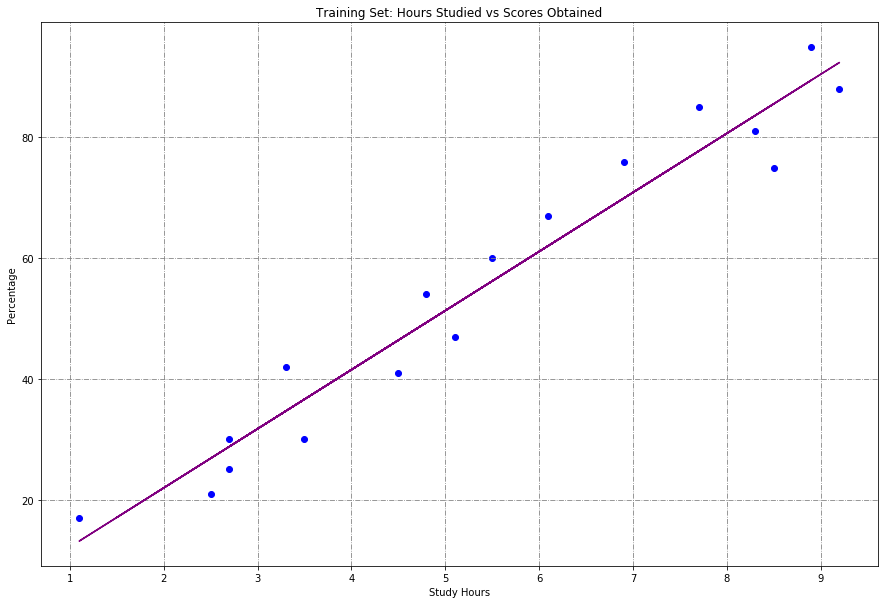

In [23]:
line = x*h + c
plt.figure(figsize=(15,10))
plt.scatter(h_train, s_train, color='blue')
plt.plot(h, line, color='purple');
plt.title('Training Set: Hours Studied vs Scores Obtained')
plt.xlabel('Study Hours')  
plt.ylabel('Percentage') 
plt.grid(True, color='gray', linestyle='-.')
plt.show()

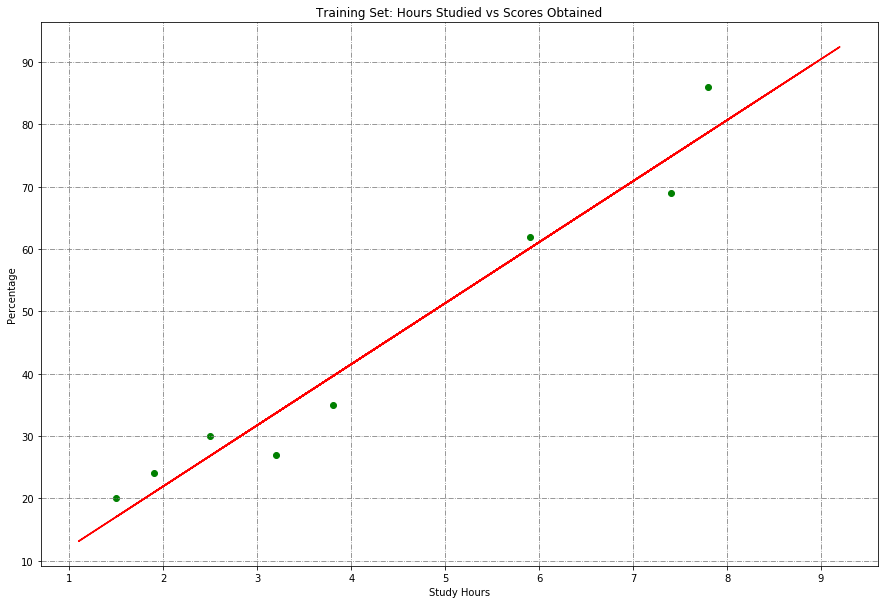

In [24]:
plt.figure(figsize=(15,10))
plt.scatter(h_test, s_test, color='green')
plt.plot(h, line, color='red');
plt.title('Training Set: Hours Studied vs Scores Obtained')
plt.xlabel('Study Hours')  
plt.ylabel('Percentage') 
plt.grid(True, color='gray', linestyle='-.')
plt.show()

### 7. Making Predictions with the Test Data

In [27]:
#Testing data 
print(h_test) #Hours
s_pred = regModel.predict(h_test) #predicted scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


##### The Predicted Scores

In [28]:
s_pred

array([[17.05366541],
       [33.69422878],
       [74.80620886],
       [26.8422321 ],
       [60.12335883],
       [39.56736879],
       [20.96909209],
       [78.72163554]])

##### The Actual Scores

In [29]:
s_test

array([[20],
       [27],
       [69],
       [30],
       [62],
       [35],
       [24],
       [86]], dtype=int64)

### 8. As given in the question we need to make a prediction of the score when the student studies for 9.25 hours a day

In [32]:
hours = 9.25
score_pred = regModel.predict([[hours]])
print('Number of hours = {}' .format(hours))
print('Predicted Score = {}' .format(score_pred[0]))

Number of hours = 9.25
Predicted Score = [92.91505723]


> #####  <span style="color:red"> *Using the Linear Regression Model that we had trained it predicts that if a student studies for 9.25 a day the student would score 92.91505723%*</span>

### 9. EVALUATION OF THE LINEAR REGRESSION MODEL THAT WAS TRAINED 
### Using R square Method

In [30]:
rSquare = metrics.r2_score(s_test, s_pred)
print('R^2 Score for the above Linear Regression Model is ', rSquare)

R^2 Score for the above Linear Regression Model is  0.9568211104435257


## ----------------------------------------------------------------------------------------------------------------------------------

## Thank You!